In [1]:
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats

%matplotlib inline

set_matplotlib_formats('retina')

plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)

In [2]:
df=pd.read_csv('./data/서울특별시 동작구_일반 및 휴게음식점 현황_20190416.csv', encoding='cp949')
df.head()

,업종명,인허가일자,업소명,소재지(도로명),소재지(지번),영업장면적,소재지전화,업태명
0,일반음식점,1967-10-10,청기와뼈다귀해장국,서울특별시 동작구 흑석로 94 (흑석동),서울특별시 동작구 흑석동 223번지 1호,163.96,02-822-8060,한식
1,일반음식점,1972-04-14,안동장,서울특별시 동작구 흑석로 105-1 (흑석동),서울특별시 동작구 흑석동 184번지 18호,321.03,02-813-0572,중국식
2,일반음식점,1974-11-14,영빈관,서울특별시 동작구 장승배기로19길 21 (노량진동),서울특별시 동작구 노량진동 313번지 91호,29.93,02-813-3088,중국식
3,일반음식점,1975-05-15,바다회센타,서울특별시 동작구 동작대로27길 20-7 (사당동),서울특별시 동작구 사당동 130번지 16호,71.41,02-0533-0594,일식
4,일반음식점,1975-09-24,야채순대곱창,서울특별시 동작구 동작대로27길 16-7 (사당동),서울특별시 동작구 사당동 130번지 13호,23.19,02-3476-2259,정종/대포집/소주방


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4321 entries, 0 to 4320
Data columns (total 8 columns):
업종명         4321 non-null object
인허가일자       4321 non-null object
업소명         4321 non-null object
소재지(도로명)    4264 non-null object
소재지(지번)     4201 non-null object
영업장면적       4321 non-null float64
소재지전화       2526 non-null object
업태명         4321 non-null object
dtypes: float64(1), object(7)
memory usage: 270.1+ KB


동작구의 주요 프랜차이즈 식당 알아보기

In [4]:
df['업소명'].value_counts().head(10)

김밥천국      10
엉터리생고기     8
커피나무       6
교촌치킨       5
실내포장마차     5
전주식당       5
남원추어탕      4
자금성        4
노랑통닭       4
본죽         4
Name: 업소명, dtype: int64

In [5]:
df['브랜드명']=''

In [6]:
# 김밥천국에 대한 레이블링
df.loc[df['업소명'].str.contains('김밥천국'), '브랜드명'] = '김밥천국'
df[df['업소명'] == '김밥천국']

,업종명,인허가일자,업소명,소재지(도로명),소재지(지번),영업장면적,소재지전화,업태명,브랜드명
407,일반음식점,1995-11-14,김밥천국,서울특별시 동작구 장승배기로 110-1 (노량진동),서울특별시 동작구 노량진동 311번지 20호,52.63,02-814-5515,한식,김밥천국
502,일반음식점,1997-10-14,김밥천국,서울특별시 동작구 흑석로 101 (흑석동),서울특별시 동작구 흑석동 184번지 27호,35.95,02-815-6357,분식,김밥천국
690,일반음식점,1999-12-29,김밥천국,서울특별시 동작구 상도로 154 (상도동),서울특별시 동작구 상도동 186번지 5호,35.16,02-824-8710,분식,김밥천국
761,일반음식점,2000-11-28,김밥천국,서울특별시 동작구 시흥대로 658 (신대방동),서울특별시 동작구 신대방동 607번지 5호,49.30,02-834-7777,분식,김밥천국
954,일반음식점,2003-03-11,김밥천국,서울특별시 동작구 여의대방로 188-1 (대방동),서울특별시 동작구 대방동 389번지 12호,40.78,NaN,분식,김밥천국
1041,일반음식점,2004-02-24,김밥천국,서울특별시 동작구 노량진로 250 (본동),서울특별시 동작구 본동 126번지 13호,44.25,02-813-8144,분식,김밥천국
1065,일반음식점,2004-05-06,김밥천국,서울특별시 동작구 흑석로 6 (상도1동),서울특별시 동작구 상도1동 645번지 1호,63.80,NaN,한식,김밥천국
1108,일반음식점,2004-11-11,김밥천국,서울특별시 동작구 동작대로 43 (사당동),서울특별시 동작구 사당동 1030번지 20호,25.73,NaN,분식,김밥천국
1387,일반음식점,2007-05-30,김밥천국,서울특별시 동작구 상도로 267 (상도1동),서울특별시 동작구 상도1동 701번지 3호,27.28,NaN,분식,김밥천국
3420,휴게음식점,2008-10-17,김밥천국,"서울특별시 동작구 상도로15길 39, 1층 (상도동)",서울특별시 동작구 상도동 356번지 211호,26.00,NaN,일반조리판매,김밥천국


In [7]:
# 이걸 반복문으로 처리할 수 있을까?
# 상위 10개 업소명에 대한 브랜드 레이블링
df.loc[df['업소명'].str.contains('김밥천국'), '브랜드명'] = '김밥천국'
df.loc[df['업소명'].str.contains('엉터리생고기'), '브랜드명'] = '엉터리생고기'
df.loc[df['업소명'].str.contains('커피나무'), '브랜드명'] = '커피나무'
df.loc[df['업소명'].str.contains('교촌치킨'), '브랜드명'] = '교촌치킨'
df.loc[df['업소명'].str.contains('본죽'), '브랜드명'] = '본죽'
df.loc[df['업소명'].str.contains('실내포장마차'), '브랜드명'] = '실내포장마차'
df.loc[df['업소명'].str.contains('전주식당'), '브랜드명'] = '전주식당'
df.loc[df['업소명'].str.contains('남원추어탕'), '브랜드명'] = '남원추어탕'
df.loc[df['업소명'].str.contains('페리카나치킨'), '브랜드명'] = '페리카나치킨'
df.loc[df['업소명'].str.contains('포마토'), '브랜드명'] = '포마토'

In [8]:
# df['브랜드명']==[['엉터리생고기'|'본죽']]
df_top = df[df['브랜드명'].str.contains(
    '엉터리생고기|커피나무|교촌치킨|본죽|실내포장마차|전주식당|남원추어탕|페리카나치킨|포마토|김밥천국')]
df_top.head()

,업종명,인허가일자,업소명,소재지(도로명),소재지(지번),영업장면적,소재지전화,업태명,브랜드명
28,일반음식점,1982-10-12,교촌치킨,"서울특별시 동작구 시흥대로 646, 지상1층 (신대방동)",서울특별시 동작구 신대방동 607번지 28호,72.60,02-846-9992,호프/통닭,교촌치킨
91,일반음식점,1987-12-15,전주식당,서울특별시 동작구 성대로2길 3-2 (상도동),서울특별시 동작구 상도동 316번지 12호,34.80,02-820-7219,한식,전주식당
112,일반음식점,1988-08-18,포마토김밥,서울특별시 동작구 보라매로 106 (신대방동),서울특별시 동작구 신대방동 347번지 13호,45.64,02-821-5400,한식,포마토
140,일반음식점,1990-10-29,페리카나치킨,서울특별시 동작구 장승배기로19길 12 (노량진동),서울특별시 동작구 노량진동 306번지 5호,15.37,02-812-7989,통닭(치킨),페리카나치킨
167,일반음식점,1991-05-16,원조 남원추어탕,서울특별시 동작구 상도로26길 12 (상도동),서울특별시 동작구 상도동 183번지 13호,106.80,02-821-6550,한식,남원추어탕


프랜차이즈 브랜드가 아닌 식당명의 행들을 삭제

In [9]:
df_drop = df[df['브랜드명'].str.contains('전주식당|실내포장마차')]
print(df_drop.shape)
df_drop

(14, 9)


,업종명,인허가일자,업소명,소재지(도로명),소재지(지번),영업장면적,소재지전화,업태명,브랜드명
91,일반음식점,1987-12-15,전주식당,서울특별시 동작구 성대로2길 3-2 (상도동),서울특별시 동작구 상도동 316번지 12호,34.80,02-820-7219,한식,전주식당
420,일반음식점,1995-01-16,실내포장마차,NaN,서울특별시 동작구 흑석동 95번지 98호,18.76,02-0824-6582,정종/대포집/소주방,실내포장마차
474,일반음식점,1996-05-20,실내포장마차,서울특별시 동작구 노량진로18길 23 (본동),서울특별시 동작구 본동 404번지 1호,15.39,02-825-5284,정종/대포집/소주방,실내포장마차
548,일반음식점,1998-04-21,실내포장마차,서울특별시 동작구 장승배기로 138 (노량진동),서울특별시 동작구 노량진동 233번지 6호,16.73,02-826-3365,정종/대포집/소주방,실내포장마차
555,일반음식점,1998-04-25,상도실내포장마차,서울특별시 동작구 상도로 288 (상도1동),서울특별시 동작구 상도1동 784번지 1호,21.09,02-821-3825,호프/통닭,실내포장마차
654,일반음식점,1999-09-10,전주식당,"서울특별시 동작구 사당로26길 130-6, 1층동 101호 (사당동)",서울특별시 동작구 사당동 1037번지 9호 1층동 101호,36.30,02-588-6647,한식,전주식당
716,일반음식점,2000-06-07,실내포장마차,"서울특별시 동작구 장승배기로 153-2, 1층 (노량진동)",서울특별시 동작구 노량진동 240번지 18호,30.00,02-822-0303,정종/대포집/소주방,실내포장마차
722,일반음식점,2000-07-03,전주식당,서울특별시 동작구 여의대방로44길 10 (대방동),서울특별시 동작구 대방동 501번지 대림쇼핑타운 지층 113,30.34,02-814-3166,한식,전주식당
882,일반음식점,2002-04-16,왕바우실내포장마차,서울특별시 동작구 신대방11길 25 (신대방동),서울특별시 동작구 신대방동 688번지 0호,19.75,02-841-0588,정종/대포집/소주방,실내포장마차
937,일반음식점,2002-12-10,전주식당,서울특별시 동작구 성대로6가길 2 (상도동),서울특별시 동작구 상도동 256번지 4호,29.62,02-825-3123,한식,전주식당


In [10]:
print(df_top[df_top['브랜드명'].str.contains('전주식당|실내포장마차')].shape)
df_drop = df_top[df_top['브랜드명'].str.contains('전주식당|실내포장마차')].index
df_drop

(14, 9)


Int64Index([91, 420, 474, 548, 555, 654, 716, 722, 882, 937, 1503, 1551, 2548,
            3037],
           dtype='int64')

In [11]:
df_drop = df_drop.tolist()
df_drop

[91, 420, 474, 548, 555, 654, 716, 722, 882, 937, 1503, 1551, 2548, 3037]

In [12]:
df_drop

[91, 420, 474, 548, 555, 654, 716, 722, 882, 937, 1503, 1551, 2548, 3037]

In [13]:
print(df_top.shape)
df_top = df_top.drop(df_drop, axis=0)
print(df_top.shape)

(87, 9)
(73, 9)


그래프로 그려보기

In [14]:
a = pd.DataFrame(df_top['브랜드명'].value_counts())
a

,브랜드명
커피나무,15
본죽,12
김밥천국,11
엉터리생고기,9
포마토,8
교촌치킨,8
남원추어탕,6
페리카나치킨,4


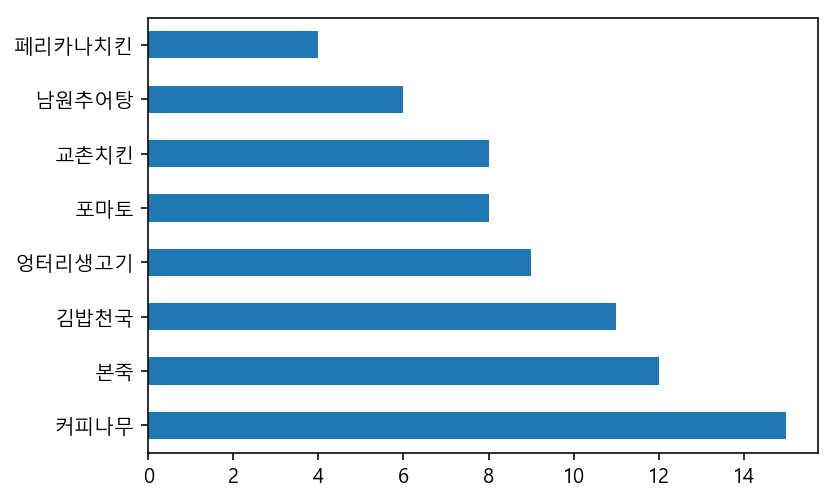

In [15]:
df_top['브랜드명'].value_counts().plot.barh()

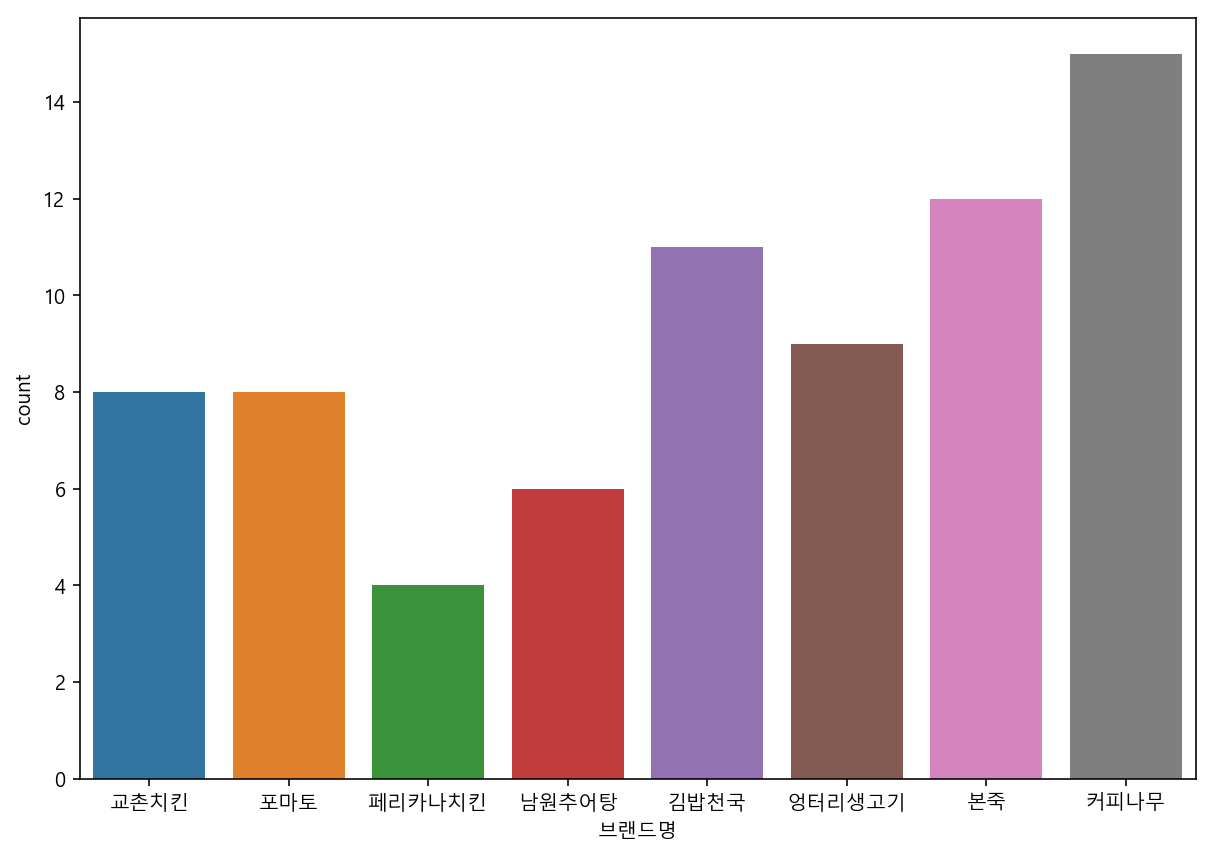

In [16]:
plt.figure(figsize=(10,7))
sns.countplot(data=df_top, x='브랜드명')